In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import pandas as pd

In [2]:
house = "Resources/Final_rent_homevalue.csv"

In [3]:
house = pd.read_csv(house, encoding = "ISO-8859-1")

In [4]:
house.head()


,zipcode,primarycity,city,date,rent,latitude,longitude,county,year,month,homevalue
0,91710,Chino,"Riverside, CA",2014-01-01,"$1,810.00",34.00,-117.68,San Bernardino County,2014,1,"$393,085.00"
1,28078,Huntersville,"Charlotte, NC",2014-01-01,"$1,205.00",35.41,-80.84,Mecklenburg County,2014,1,"$252,566.00"
2,89074,Henderson,"Las Vegas, NV",2014-01-01,"$1,040.00",36.03,-115.07,Clark County,2014,1,"$216,309.00"
3,20910,Silver Spring,"Washington, DC",2014-01-01,"$1,830.00",39.00,-77.04,Montgomery County,2014,1,"$541,022.00"
4,55104,Saint Paul,"Minneapolis-St Paul, MN",2014-01-01,"$1,087.00",44.95,-93.16,Ramsey County,2014,1,"$190,597.00"


In [5]:
house["rent"] = house["rent"].str.replace("$", "")
house["rent"] = house["rent"].str.replace(",", "")
house["rent"] = house["rent"].astype(float)


/var/folders/mt/t33nk5_d1nn6j4wfq6p3l3340000gn/T/ipykernel_21248/830307489.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  house["rent"] = house["rent"].str.replace("$", "")


In [6]:
house.columns

Index(['zipcode', 'primarycity', 'city', 'date', 'rent', 'latitude',
       'longitude', 'county', 'year', 'month', 'homevalue'],
      dtype='object')

In [7]:
house["homevalue"] = house["homevalue"].str.replace("$", "")
house["homevalue"] = house["homevalue"].str.replace(",", "")
house["homevalue"] = house["homevalue"].astype(float)

/var/folders/mt/t33nk5_d1nn6j4wfq6p3l3340000gn/T/ipykernel_21248/2662781593.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  house["homevalue"] = house["homevalue"].str.replace("$", "")


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216608 entries, 0 to 216607
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   zipcode      216608 non-null  int64  
 1   primarycity  216608 non-null  object 
 2   city         216608 non-null  object 
 3   date         216608 non-null  object 
 4   rent         216608 non-null  float64
 5   latitude     216608 non-null  float64
 6   longitude    216608 non-null  float64
 7   county       216509 non-null  object 
 8   year         216608 non-null  int64  
 9   month        216608 non-null  int64  
 10  homevalue    216608 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 18.2+ MB


In [9]:
house.describe()

,zipcode,rent,latitude,longitude,year,month,homevalue
count,216608.000000,216608.000000,216608.000000,216608.000000,216608.000000,216608.000000,2.166080e+05
mean,54924.910830,1667.264381,35.505987,-94.443329,2017.683437,6.377553,4.384376e+05
std,30846.015989,835.472886,5.351203,17.671219,2.361714,3.479039,4.043536e+05
min,1604.000000,84.000000,21.270000,-158.080000,2014.000000,1.000000,1.943100e+04
25%,30022.000000,1215.000000,32.790000,-112.310000,2016.000000,3.000000,2.112858e+05
50%,48326.000000,1503.000000,34.300000,-87.620000,2018.000000,6.000000,3.163100e+05
75%,85653.000000,1937.000000,39.690000,-80.200000,2020.000000,9.000000,5.126048e+05
max,99206.000000,30255.000000,48.180000,-70.660000,2022.000000,12.000000,5.990842e+06


In [10]:
housevalue = house["rent"]

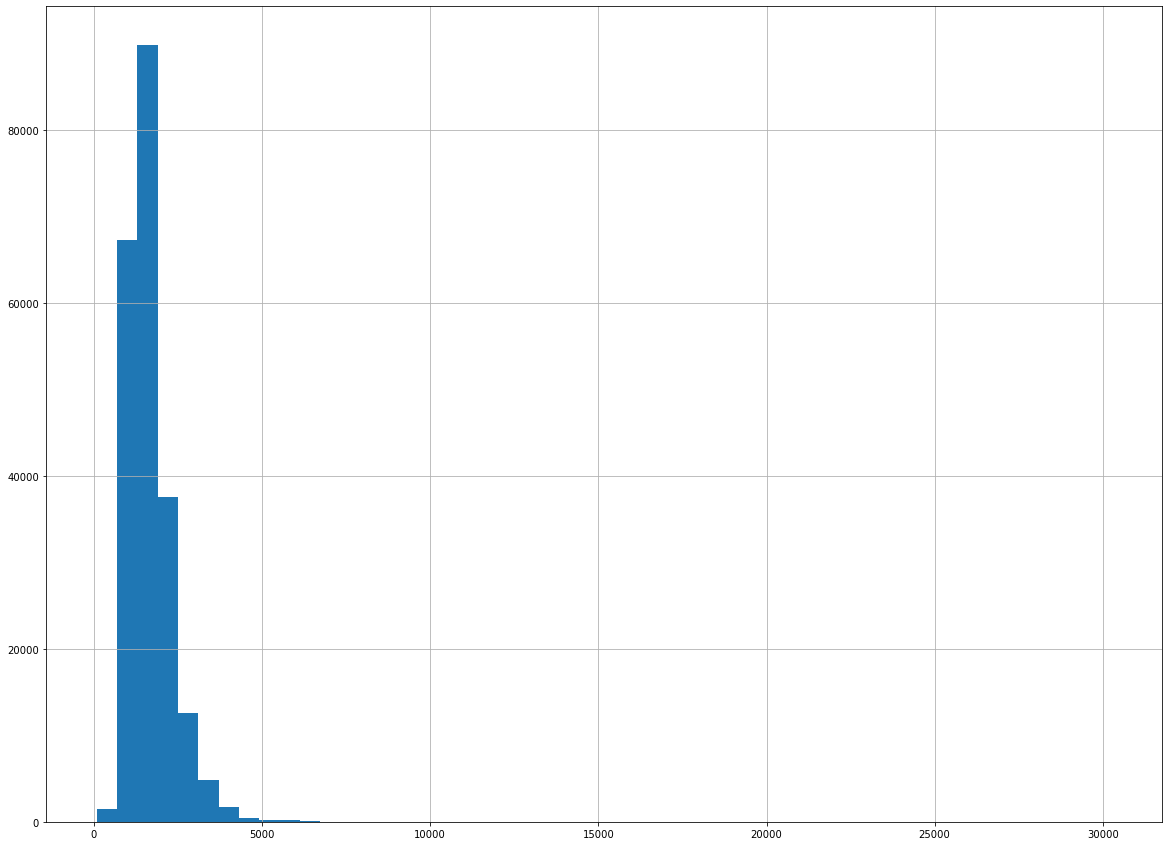

In [11]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline
import matplotlib.pyplot as plt
housevalue.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
# Create our features
X = house.drop(columns=["rent","primarycity","city", "county","date"])
X = pd.get_dummies(X)


# Create our target
y = house["rent"]

In [13]:
X.describe()

,zipcode,latitude,longitude,year,month,homevalue
count,216608.000000,216608.000000,216608.000000,216608.000000,216608.000000,2.166080e+05
mean,54924.910830,35.505987,-94.443329,2017.683437,6.377553,4.384376e+05
std,30846.015989,5.351203,17.671219,2.361714,3.479039,4.043536e+05
min,1604.000000,21.270000,-158.080000,2014.000000,1.000000,1.943100e+04
25%,30022.000000,32.790000,-112.310000,2016.000000,3.000000,2.112858e+05
50%,48326.000000,34.300000,-87.620000,2018.000000,6.000000,3.163100e+05
75%,85653.000000,39.690000,-80.200000,2020.000000,9.000000,5.126048e+05
max,99206.000000,48.180000,-70.660000,2022.000000,12.000000,5.990842e+06


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25, random_state=12,)

In [15]:
# # Resample the training data with the RandomOversampler
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=1)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [16]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', random_state=1)
log_reg


LogisticRegression(random_state=1)

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
# Calculated the balanced accuracy score
y_pred =log_reg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
# Display the confusion matrix

confusion_matrix(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

# OVERSAMPING 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25, random_state=12)
X_train.shape

In [ ]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=12)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', random_state=1)
log_reg.fit(X_resampled, y_resampled)

In [ ]:
# Calculated the balanced accuracy score
y_pred =log_reg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:

# Display the confusion matrix

confusion_matrix(y_test, y_pred)